In [14]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import numpy.ma as ma

In [31]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
Ha_file = '/Users/nityaravi/Documents/Research/data/manga/output_files/DRP_HaVel_map_results_BB_smooth_lt_2.0_.fits'
v90_file = '/Users/nityaravi/Documents/Research/data/manga/output_files/final3table.txt'

In [4]:
hdul = fits.open(Ha_file)

In [5]:
Ha = Table.read(Ha_file, format='fits')
v_table = Table.read(v90_file, format = 'ascii.commented_header')

In [6]:
Ha[0]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.0835,41.292,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.69906,2.64546,2.59645,2.54039,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.66562,0.705713,203,1350,6,v1_0_1,51226,-999,0.0392074,0.0395926,-16.2982 .. -19.5112,-16.2321 .. -19.5522,275.541 .. 452.944,3068010000.0,2685340000.0,0.417013,69.2463,0.448783 .. 0.0800664,5.16633,3.63987,12.7947 .. 413.049,3.26768 .. 0.000422625,13.8306 .. 425.941,3.03694 .. 0.00496838,0.335333,0.741845,68.2584,5.29184,14.8124 .. 412.19,2.50888 .. 0.0150605,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--


In [7]:
v_table[0]

plateifu,Mtot,Mtot_err,Mstar,Mstar_err,MHI,MH2,Mdust,Mr,Z,R90,v_max,r_turn,alpha,v_R90,v_R90_err
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001-3702,11.052790322774381,10.928525167884018,10.0200393746564,12.86078304577374,8.947139739990234,8.77132441413365,6.942434416615007,-19.4337,8.754925012287872,13.263102531433105,313.6762095221658,0.7925717678215113,8.720845050623494,313.6762052707942,3.204736962978333


In [8]:
sersic_ba = np.zeros(len(v_table['plateifu']))
ba = np.zeros(len(v_table['plateifu']))
v_max = np.zeros(len(v_table['plateifu']))
v_R90 = np.zeros(len(v_table['plateifu']))

In [9]:
for i in range(0, len(v_table['plateifu'])):
    
    i_Ha = np.where(Ha['plateifu'] == v_table['plateifu'][i])[0][0]
    sersic_ba[i] = Ha['nsa_sersic_ba'][i_Ha]
    ba[i] = Ha['ba'][i_Ha]
    v_max[i] = v_table['v_max'][i]
    v_R90[i] = v_table['v_R90'][i]
    
    

In [18]:
v_fraction = v_R90/v_max


In [19]:
v_fraction

array([0.99999999, 0.99999619, 0.83009596, 0.4609993 , 0.92510819,
       0.60168276, 1.        , 1.        , 0.99943847, 0.90683534,
       0.95056072, 0.99999922, 0.99994113, 0.55339163, 0.79965768,
       0.45111776, 0.94871942, 0.99994762, 0.99767733, 0.98744574,
       0.72067344, 0.99861387, 0.99998391, 0.99844297, 0.99150198,
       0.99999999, 0.72651565, 0.86922356, 0.99978576, 0.42816356,
       0.95318045, 0.7455502 , 0.36918475, 0.99955443, 0.38168219,
       0.99999876, 0.99970857, 0.92290023, 0.93433199, 0.96605065,
       0.99241806, 0.96832967, 0.99578591, 0.99990634, 0.99999114,
       0.93088546, 0.59040389, 0.99829191, 0.98331328, 0.99998487,
       0.96505714, 0.99198249, 0.95415009, 0.90070193, 0.98931816,
       0.96716488, 0.99990639, 0.87892111, 0.96902688, 0.83376464,
       0.98900427, 0.90074635, 0.99998805, 0.95159779, 0.61101562,
       0.99989015, 0.70968201, 0.99721464, 0.99741375, 0.99723127,
       0.98463528, 0.94640321, 0.96264438, 0.99402683, 0.98230

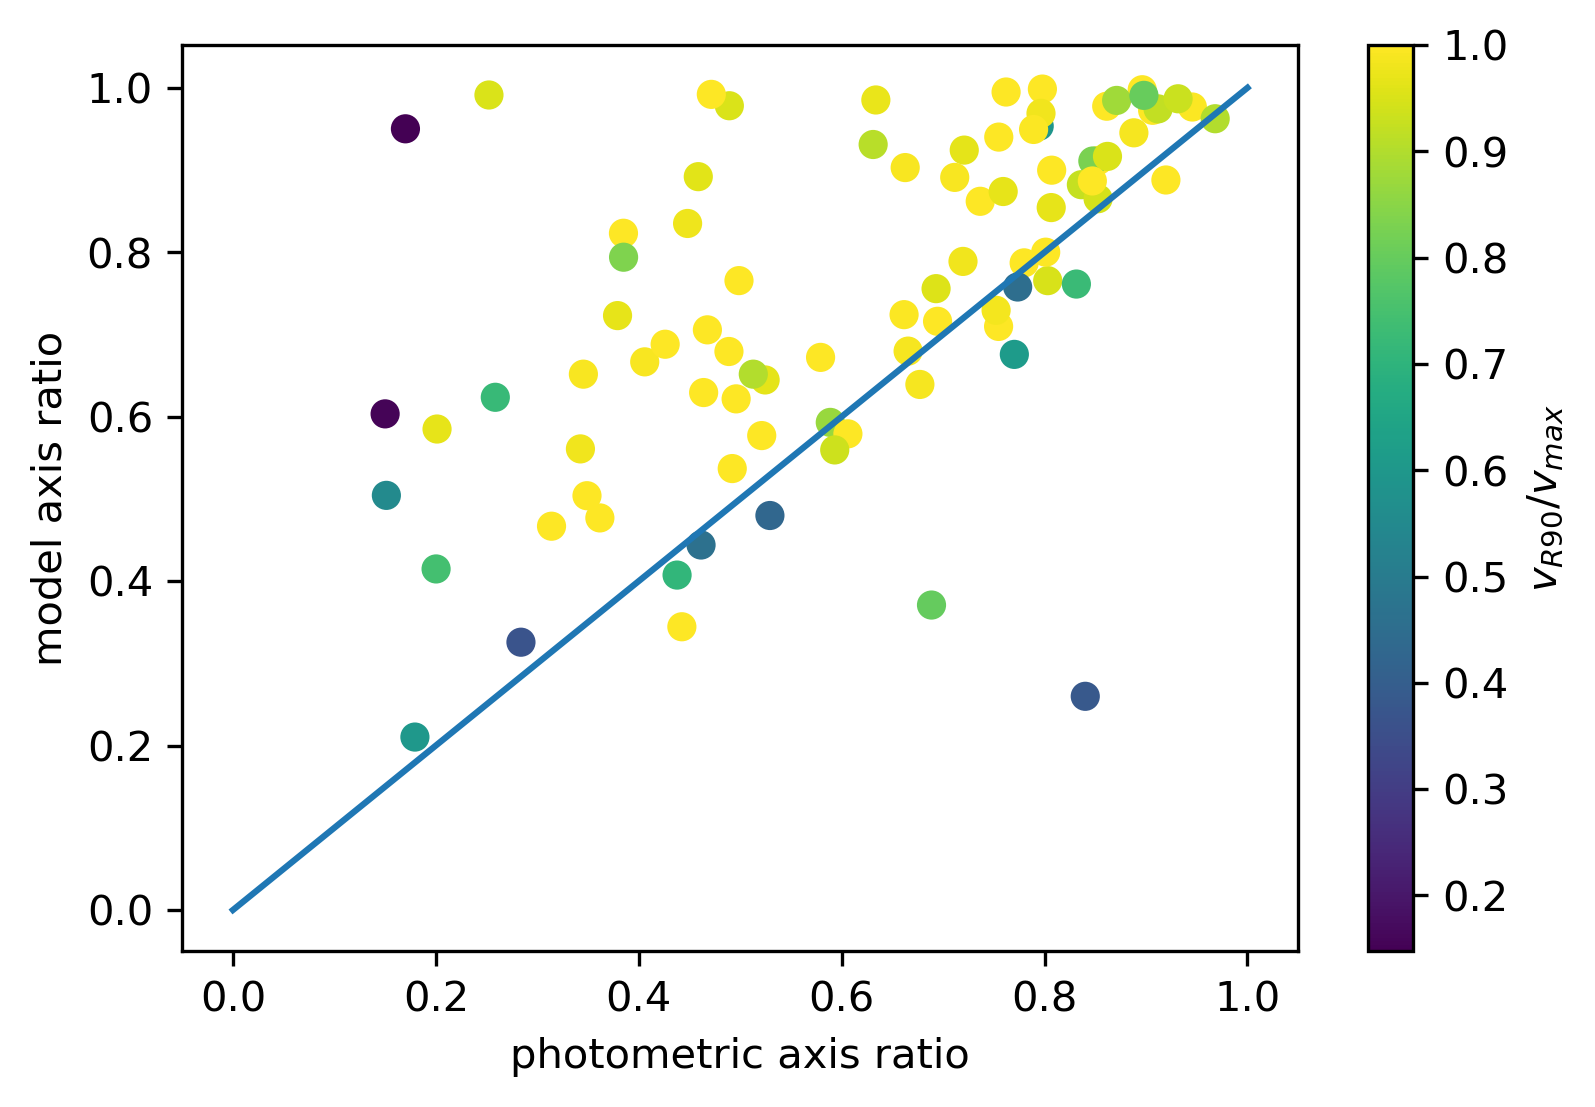

In [35]:
plt.scatter(sersic_ba, ba, c=v_fraction, cmap = 'viridis')
plt.colorbar(label='$v_{R90}/v_{max}$')
plt.plot([0,1],[0,1])
plt.xlabel('photometric axis ratio')
plt.ylabel('model axis ratio')
plt.show()